In [1]:
%load_ext autoreload
%autoreload 2

from Eir import AgeStructuredSIR, AgeStructuredSIRD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 31, 0.1

## AgeStructuredSIR

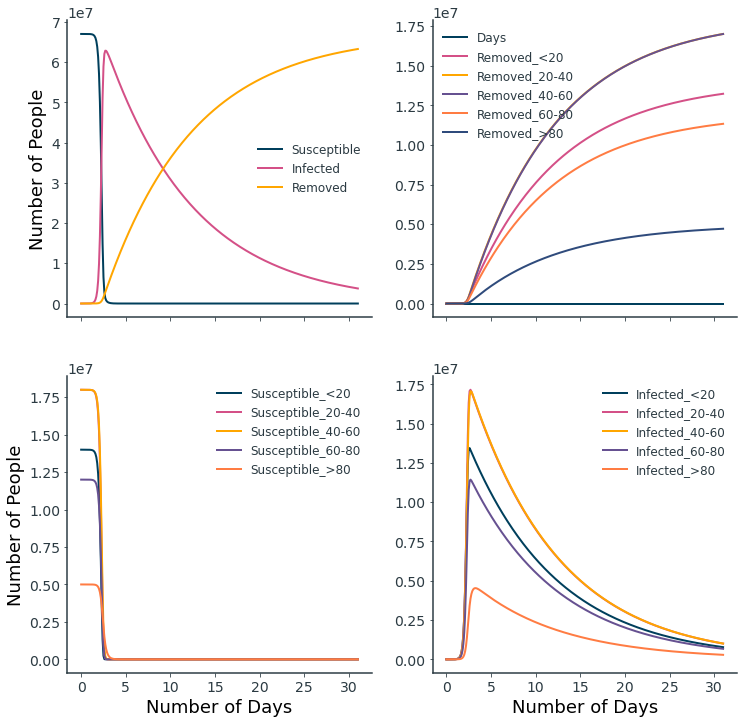

In [4]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = np.array([
    [4,   2.5, 1.6, 1,   0.1],
    [2.5, 3,   2.2, 1.4, 0.2],
    [1.6, 2.2, 2.5, 1.8, 0.3],
    [1,   1.4, 1.8, 2,   0.4],
    [0.1, 0.2, 0.3, 0.4, 0.5]
])
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIR(labels, beta, gamma, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

## AgeStructuredSIRD

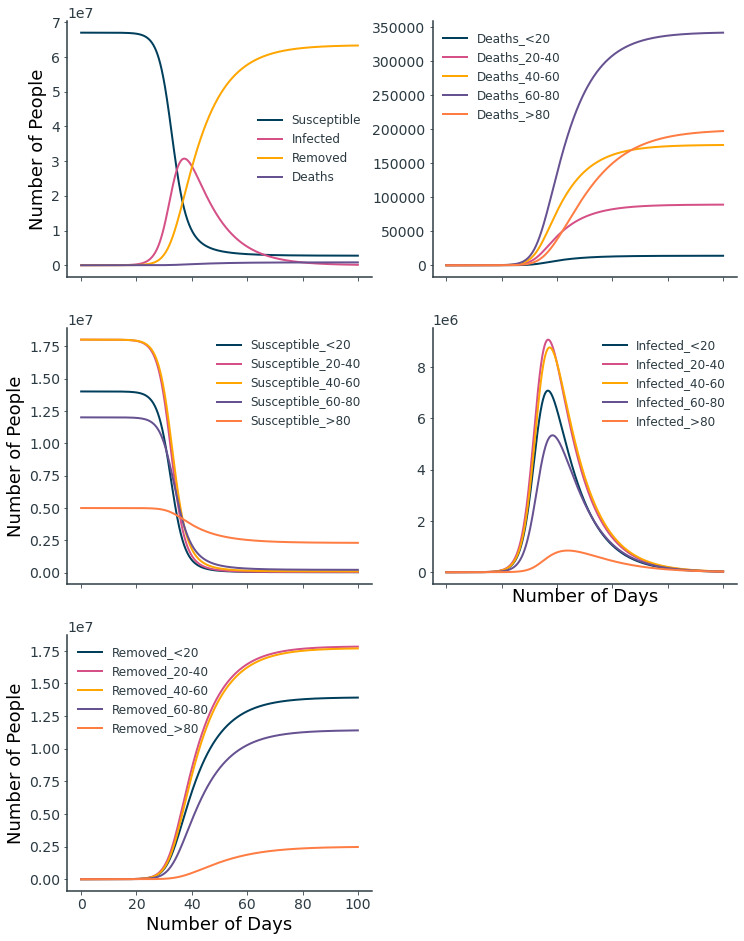

In [5]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = np.array(
    [
        [0.25, 0.15625, 0.1, 0.0625, 0.00625],
        [0.15625, 0.1875, 0.1375, 0.0875, 0.0125],
        [0.1, 0.1375, 0.15625, 0.1125, 0.01875],
        [0.0625, 0.0875, 0.1125, 0.125, 0.025],
        [0.00625, 0.0125, 0.01875, 0.025, 0.03125],
    ]
)
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(100, 0.1)
fig

In [6]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(int)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep
fatality_rates = pd.Series(end_deaths.values / end_infect.values, index=end_deaths.index)
for g, f, d, i, t in zip(end_deaths.index, fatality_rates, end_deaths, end_infect, total):
    print(f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected")

Deaths      : 1.28% fatality rate - 819,416 deaths - 64,244,703/67,000,067 infected
Deaths_<20  : 0.10% fatality rate -  13,919 deaths - 13,953,676/14,000,014 infected
Deaths_20-40: 0.50% fatality rate -  89,132 deaths - 17,941,646/18,000,018 infected
Deaths_40-60: 0.99% fatality rate - 176,870 deaths - 17,892,694/18,000,018 infected
Deaths_60-80: 2.91% fatality rate - 342,131 deaths - 11,770,375/12,000,012 infected
Deaths_>80  : 7.35% fatality rate - 197,362 deaths -  2,686,314/ 5,000,005 infected


## AgeStructuredSIRVD

### Vaccinate Young First

In [7]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
V0, Vd = [0, 0, 0, 0, 0], 200_000
beta = np.array(
    [
        [0.25, 0.15625, 0.1, 0.0625, 0.00625],
        [0.15625, 0.1875, 0.1375, 0.0875, 0.0125],
        [0.1, 0.1375, 0.15625, 0.1125, 0.01875],
        [0.0625, 0.0875, 0.1125, 0.125, 0.025],
        [0.00625, 0.0125, 0.01875, 0.025, 0.03125],
    ]
)
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(100, 0.1)
fig

NameError: name 'AgeStructuredSIRVD' is not defined

In [ ]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(
    int
)
end_vaccin = df.iloc[-1][["Vaccinated"] + [f"Vaccinated_{l}" for l in labels]].astype(
    int
)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep.values - end_vaccin.values
fatality_rates = pd.Series(end_deaths.values / end_infect, index=end_deaths.index)
for g, f, d, i, t, v in zip(
    end_deaths.index, fatality_rates, end_deaths, end_infect, total, end_vaccin
):
    print(
        f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected - vaccinated {v:10,}"
    )

### Vaccinate Old First

In [ ]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
V0, Vd = [0, 0, 0, 0, 0], 200_000
beta = np.array(
    [
        [0.25, 0.15625, 0.1, 0.0625, 0.00625],
        [0.15625, 0.1875, 0.1375, 0.0875, 0.0125],
        [0.1, 0.1375, 0.15625, 0.1125, 0.01875],
        [0.0625, 0.0875, 0.1125, 0.125, 0.025],
        [0.00625, 0.0125, 0.01875, 0.025, 0.03125],
    ]
)
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(100, 0.1, reverse=True)
fig

In [ ]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(
    int
)
end_vaccin = df.iloc[-1][["Vaccinated"] + [f"Vaccinated_{l}" for l in labels]].astype(
    int
)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep.values - end_vaccin.values
fatality_rates = pd.Series(end_deaths.values / end_infect, index=end_deaths.index)
for g, f, d, i, t, v in zip(
    end_deaths.index, fatality_rates, end_deaths, end_infect, total, end_vaccin
):
    print(
        f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected - vaccinated {v:10,}"
    )

In [ ]:
labels = ["<40", "40-80", ">80"]
S0 = [32_000_000, 30_000_000, 5_000_000]
I0 = [32, 30, 5]
R0 = [0, 0, 0]
V0, Vd = [0, 0, 0], 200_000
beta = np.array(
    [
        [0.25, 0.1, 0.00625],
        [0.1, 0.15625, 0.01875],
        [0.00625, 0.01875, 0.03125],
    ]
)
gamma = [0.1, 0.1, 0.1]
omega = [0.0003, 0.002, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(100, 0.1)
fig

In [ ]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(
    int
)
end_vaccin = df.iloc[-1][["Vaccinated"] + [f"Vaccinated_{l}" for l in labels]].astype(
    int
)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep.values - end_vaccin.values
fatality_rates = pd.Series(end_deaths.values / end_infect, index=end_deaths.index)
for g, f, d, i, t, v in zip(
    end_deaths.index, fatality_rates, end_deaths, end_infect, total, end_vaccin
):
    print(
        f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected - vaccinated {v:10,}"
    )

In [ ]:
labels = ["<40", "40-80", ">80"]
S0 = [32_000_000, 30_000_000, 5_000_000]
I0 = [32, 30, 5]
R0 = [0, 0, 0]
V0, Vd = [0, 0, 0], 200_000
beta = np.array(
    [
        [0.25, 0.1, 0.00625],
        [0.1, 0.15625, 0.01875],
        [0.00625, 0.01875, 0.03125],
    ]
)
gamma = [0.1, 0.1, 0.1]
omega = [0.0003, 0.002, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRVD(labels, beta, gamma, omega, Vd, S0, I0, R0, V0)
df, fig = sim.run(100, 0.1, reverse=True)
fig

In [ ]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(
    int
)
end_vaccin = df.iloc[-1][["Vaccinated"] + [f"Vaccinated_{l}" for l in labels]].astype(
    int
)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep.values - end_vaccin.values
fatality_rates = pd.Series(end_deaths.values / end_infect, index=end_deaths.index)
for g, f, d, i, t, v in zip(
    end_deaths.index, fatality_rates, end_deaths, end_infect, total, end_vaccin
):
    print(
        f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected - vaccinated {v:10,}"
    )